<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 8

## Conceptual

### Question 1

Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1, R_2,...$, the cutpoints $t_1, t_2,...$, and so forth.

*Hint: Your result should look something like Figures 8.1 and 8.2.*

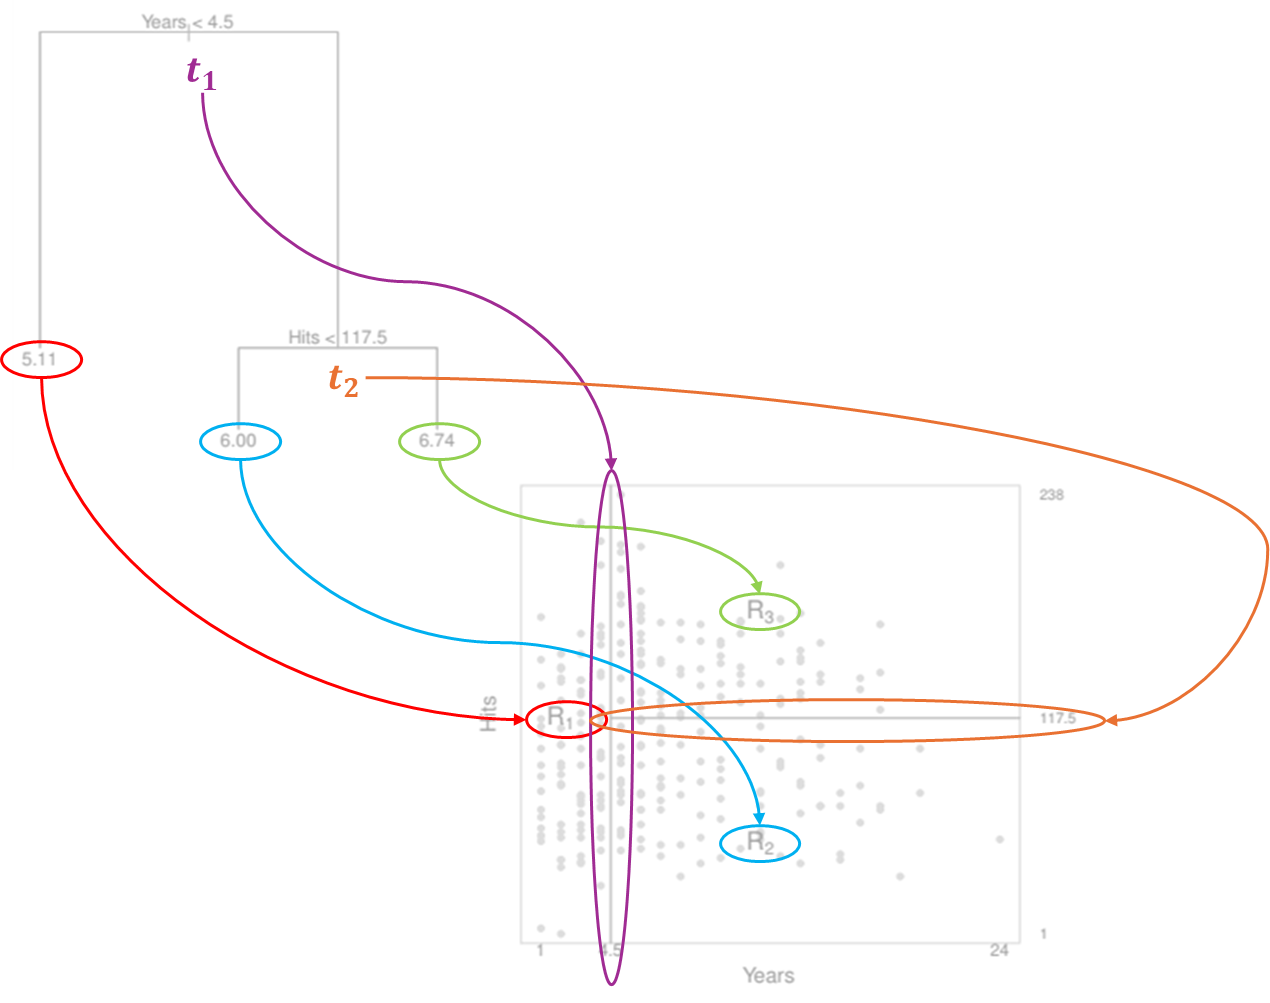

### Question 2

It is mentioned in Section 8.2.3 that boosting using depth-one trees (or *stumps*) leads to an *additive* model: that is, a model of the form

$$f(X) = \sum_{j=1}^p f_j(X_j)$$

Explain why this is the case. You can begin with (8.12) in Algorithm 8.2.

> 1. Set $\hat{f}(x)=0$ and $r_i=y_i$ for all $i$ in the training set.

> 2. For $b = 1, 2,...,B$, repeat:

> > (a) Fit a tree $\hat{f}^b$ with $d$ splits ($d + 1$ terminal nodes) to the training data $(X, r)$.

> > (b) Update $\hat{f}$ by adding in a shrunken version of the new tree:
$$\hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}^b(x)$$

> > (c) Update the residuals,
$$r_i ← r_i − λ\hat{f}^b(x_i)$$

> 3. Output the boosted model,
$$\hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x)$$

I'm not sure what's expected for this answer, but it seems rather intuitive.  Let me answer by analogy and image.

Instead of working in "function space", let's simplify by imagining Cartesian space.  We start from somewhere (blue dot) and then fit a weak-learning function ("weak" because it's so simple) to the data $\hat{f}^1(X)$.  This function *would* cast far from our desired function, so we only step $\lambda$ along that path before fitting a second weak-learning function...then another...then another until we reach our destination $\hat{f}(X)$ (red cross).  So in the end, we've just taken the $\lambda$-weighted sum of all $\hat{f}^b$ weak-learning functions.

$$\hat{f}(x) = \sum_{b=1}^B \lambda \hat{f}^b(x)$$

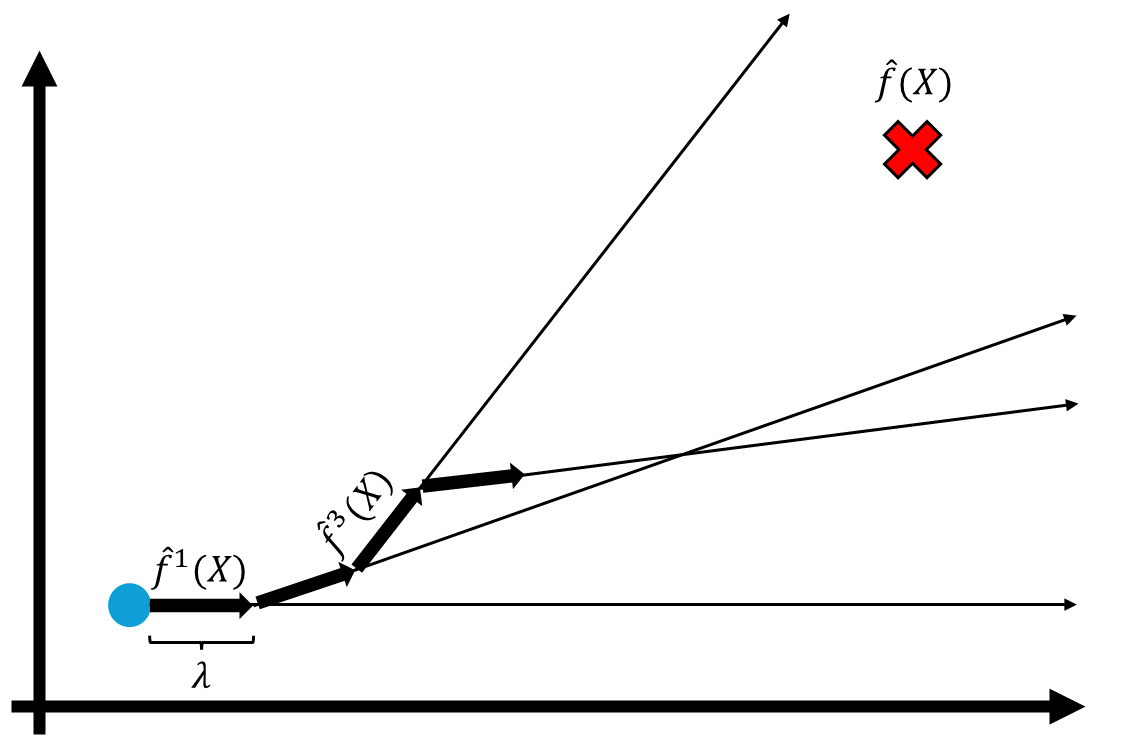

### Question 3

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The $x$-axis should display $\hat{p}_{m1}$, ranging from $0$ to $1$, and the $y$-axis should display the value of the Gini index, classification error, and entropy.

*Hint: In a setting with two classes, $\hat{p}_{m1} = 1 - \hat{p}_{m2}$. You could make this plot by hand, but it will be much easier to make in `R`.*

* **Gini Index:** $G = \sum_{k=1}^K \hat{p}_{mk}(1-\hat{p}_{mk})$
* **Classification Error:** $E = 1 - \max_k(\hat{p}_{mk})$
* **Entropy:** $D = -\sum_{k=1}^K \hat{p}_{mk} \log(\hat{p}_{mk})$

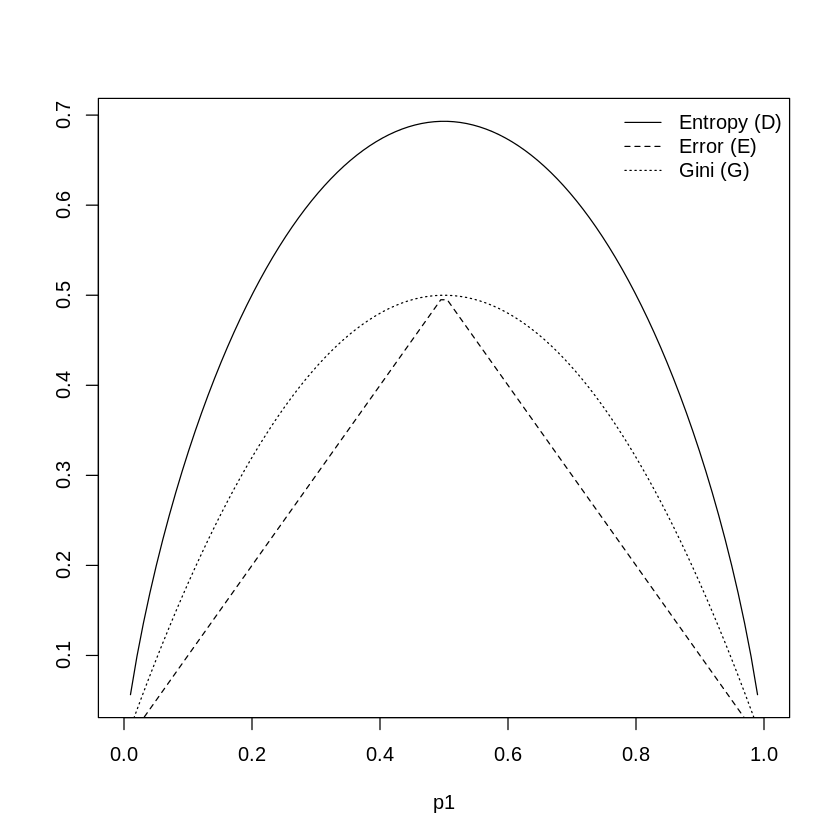

In [ ]:
p2 <- seq(0, 1, length.out = 100)
p1 <- 1 - p2

G <- 2 * p1 * (1 - p1)
E <- 1 - pmax(p1, p2)
D <- -p1 * log(p1) - p2 * log(p2)

plot(D ~ p1, type="l", lty=1, ylab=NA)
lines(E ~ p1, lty=2)
lines(G ~ p1, lty=3)
legend("topright", legend = c("Entropy (D)", "Error (E)", "Gini (G)"),
       lty = c(1, 2, 3), bty = "n")

### Question 4
This question relates to the plots in Figure 8.14.

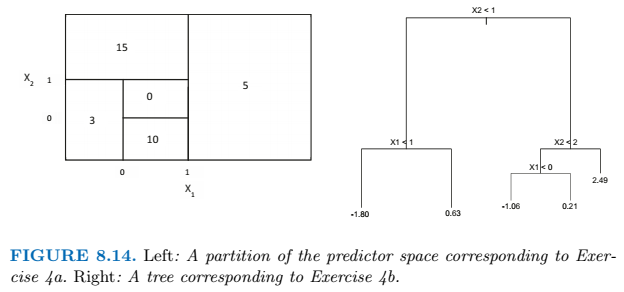

> (a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of Y within each region.

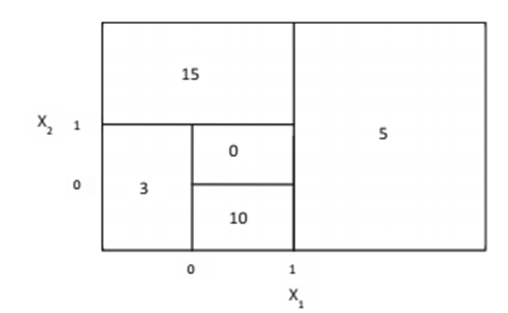

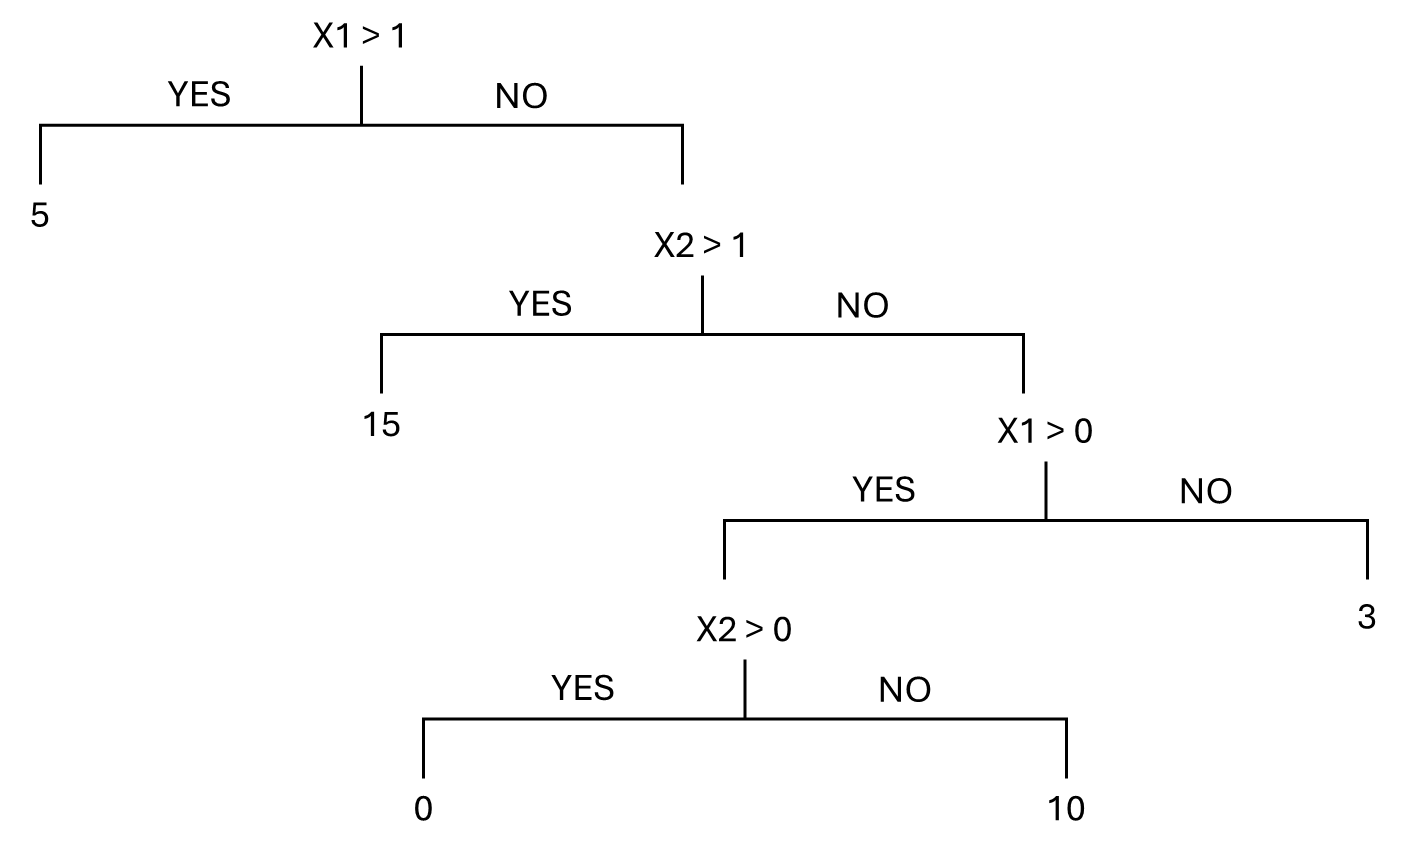

> (b) Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

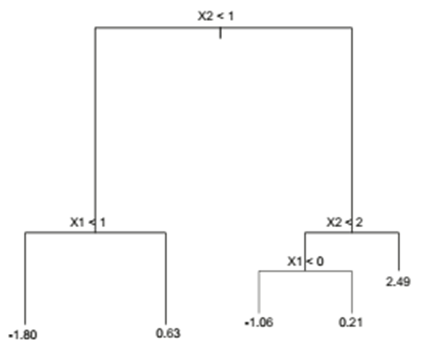

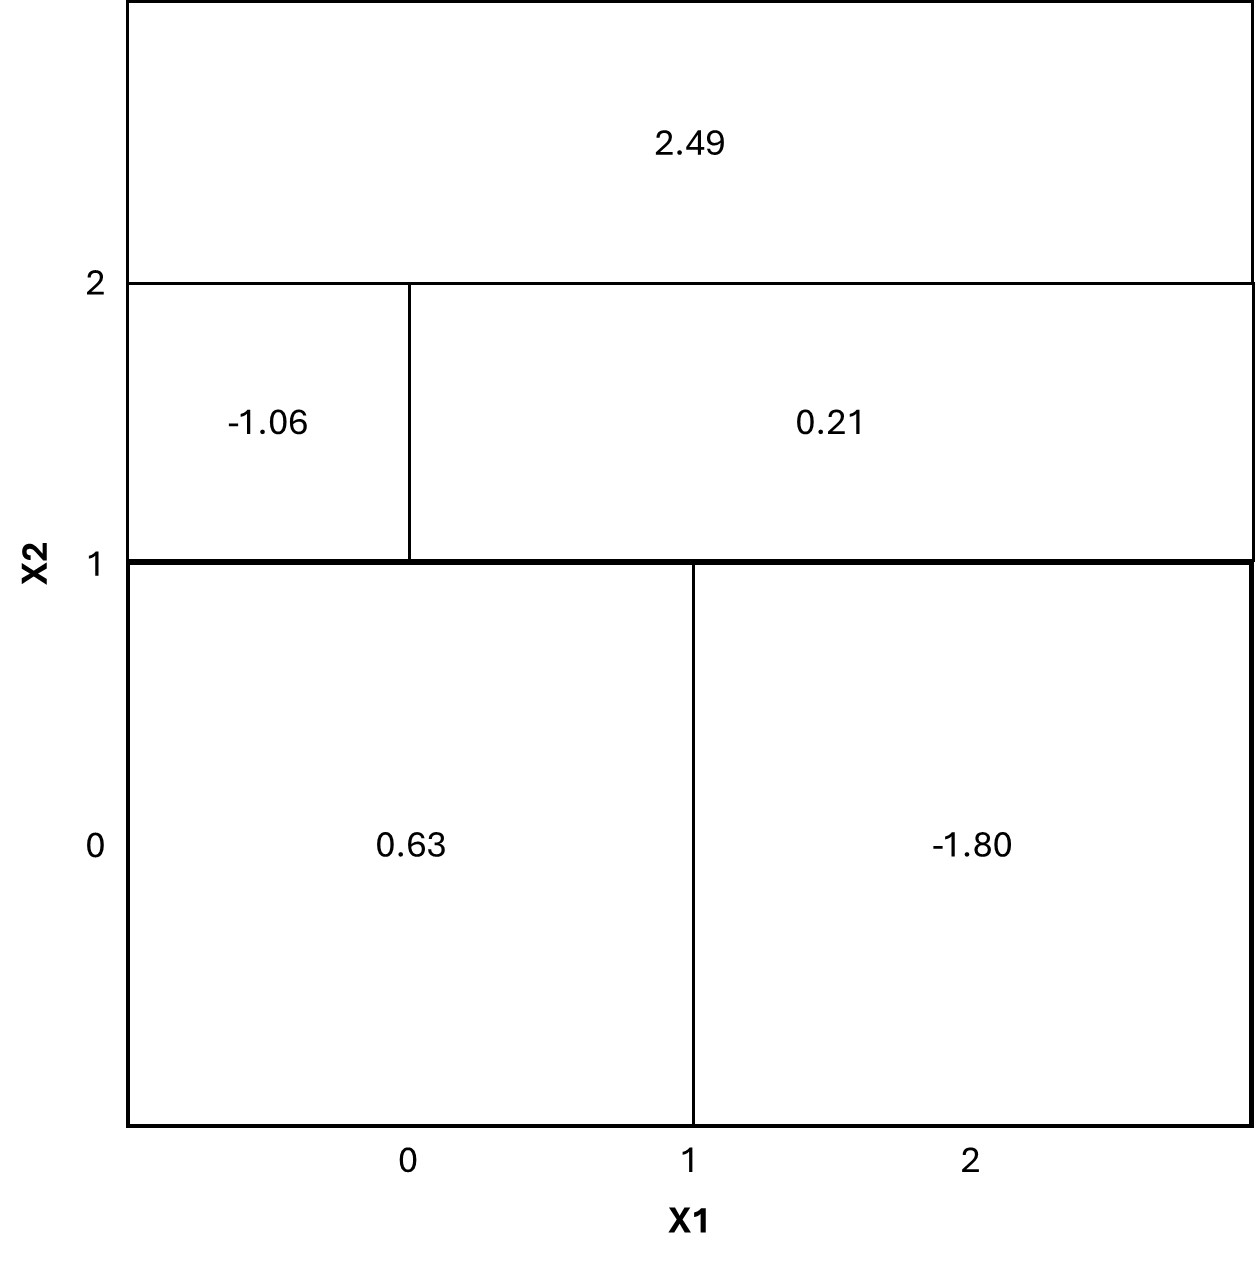

NOTE: I'm using the convention that "No" to the split condition goes right down the tree.

### Question 5

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce 10 estimates of $P(\text{Class is Red}|X)$:

> > $0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, \text{ and } 0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

**Majority Vote:**
$\{G, G, G, G, R, R, R, R, R, R \} \rightarrow \text{Red}$

**Average Probability:**
$\frac{0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75}{10} = \frac{4.5}{10} = 0.45 \rightarrow \text{Green}$

### Question 6

Provide a detailed explanation of the algorithm that is used to fit a regression tree.

I don't do this very often, but I'm going punt on this, since a detailed explanation is given in the chapter.

## Applied

### Question 7

In the lab, we applied random forests to the `Boston` data using `mtry = 6` and using `ntree = 25` and `ntree = 500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for `mtry` and `ntree`. You can model your plot after Figure 8.10. Describe the results obtained.

#### Answer

Let's just start by looking at the `mtry=6` and `ntree=25` or `ntree=500`.  Then, we'll look at a full range.

Much of this code is just copy-pasted from the book, but I had to make a few adjustments.

In [1]:
install.packages(c("ISLR2", "randomForest"))
library(ISLR2)
library(randomForest)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [2]:
set.seed (1)
train <- sample (1: nrow (Boston), nrow (Boston) / 2)
boston.test <- Boston[-train , ]

In [3]:
bag.boston25 <- randomForest (medv ~ ., data = Boston , subset = train , mtry = 6, ntree=25, importance = TRUE)
yhat.bag25 <- predict (bag.boston25 , newdata = Boston[-train , ])

bag.boston500 <- randomForest (medv ~ ., data = Boston , subset = train , mtry = 6, ntree=500, importance = TRUE)
yhat.bag500 <- predict (bag.boston500 , newdata = Boston[-train , ])

Let's put the errors on the same plot.

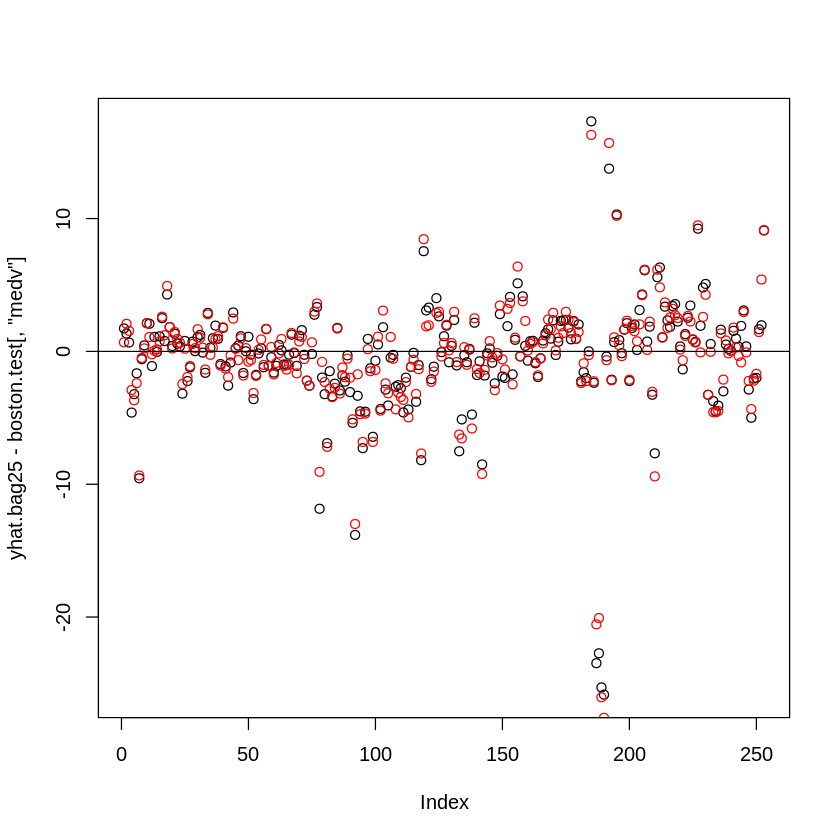

In [4]:
plot(yhat.bag25 - boston.test[,"medv"])
points(yhat.bag500 -boston.test[,"medv"], col="red")
abline(h=0)

The total errors here are

In [5]:
(res.bag25 <- round(sum(yhat.bag25 - boston.test[,"medv"])^2,2))
(res.bag500 <- round(sum(yhat.bag500 - boston.test[,"medv"])^2,2))

[1] 12423.32

[1] 11402.17

Now we let's find the test error by running $n_{tree} = 1-500$ trees $m=\{p, p/2, \sqrt{p}\}$ across $p=500$ predictors.  

In [42]:
n_tree <- 500

xTrain <- Boston[train,-13]
yTrain <- Boston[train, 13]
xTest <- Boston[-train, -13]
yTest <- Boston[-train, 13]

p <- dim(Boston)[2]-1
bag.boston500_p <- randomForest(xTrain, yTrain, xtest=xTest, ytest=yTest, mtry=p, ntree=n_tree, importance=TRUE)

p2 <- p/2
bag.boston500_p2 <- randomForest(xTrain, yTrain, xtest=xTest, ytest=yTest, mtry=p2, ntree=n_tree, importance=TRUE)

sqrt_p <- sqrt(p)
bag.boston500_sqrtp <- randomForest(xTrain, yTrain, xtest=xTest, ytest=yTest, mtry=sqrt_p, ntree=n_tree, importance=TRUE)

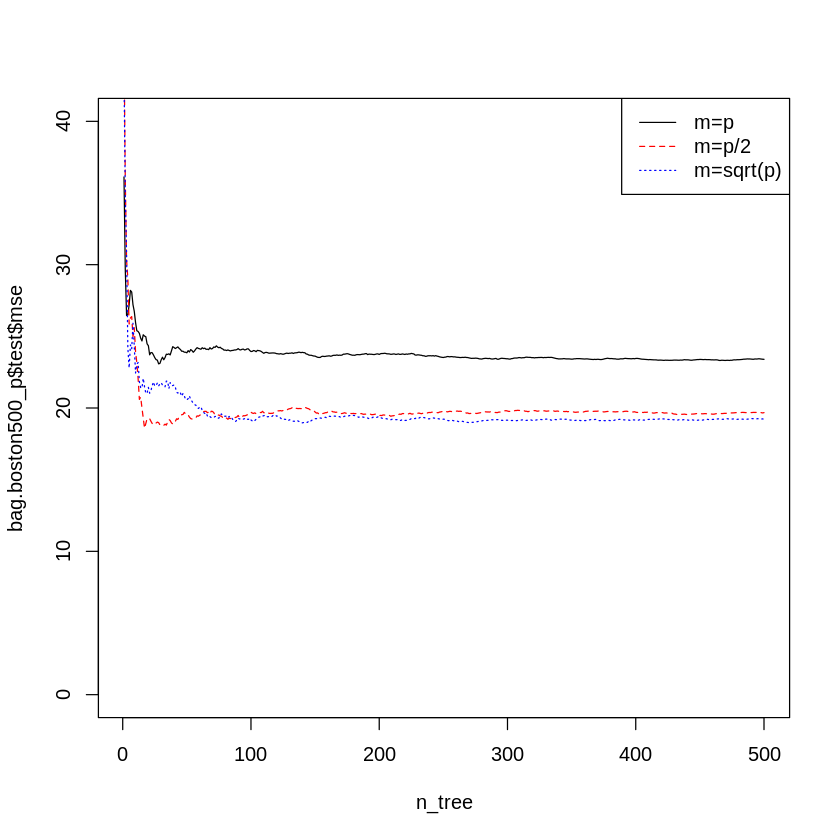

In [47]:
plot(bag.boston500_p$test$mse ~ n_tree, type="l", col="black", lty=1, ylim=c(0, 40))
lines(bag.boston500_p2$test$mse ~ n_tree, col="red", lty=2)
lines(bag.boston500_sqrtp$test$mse ~ n_tree, col="blue", lty=3)

legend("topright", c("m=p", "m=p/2", "m=sqrt(p)"), col = c("black", "red", "blue"), lty = c(1,2,3))